File student-mat.csv already exists, skipping download.
Data loaded successfully!
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Datas

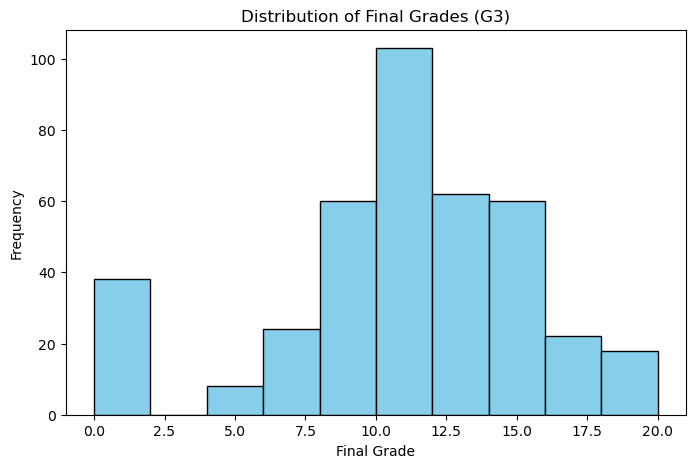

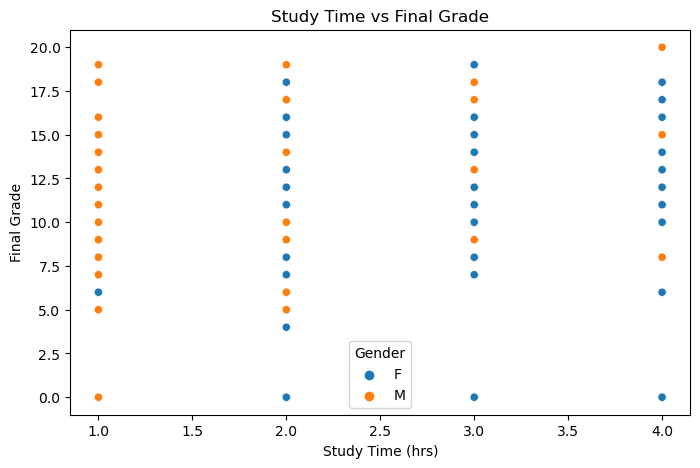

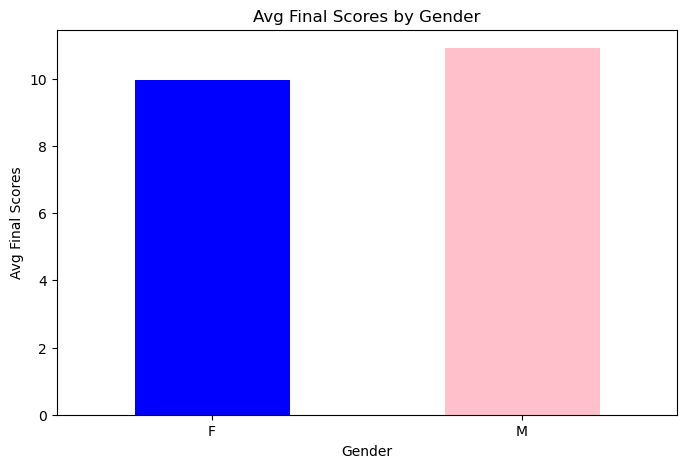

In [1]:
# Fix the pandas import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os.path

# Define the dataset path
dataset_path = "student-mat.csv"

# Check if the file already exists before trying to download
if not os.path.exists(dataset_path):
    try:
        # Alternative approach: try with a different URL or method
        # Option 1: Try with a different URL
        url = "https://raw.githubusercontent.com/datasets/student-performance/master/data/student-mat.csv"
        import urllib.request
        print("Downloading dataset...")
        urllib.request.urlretrieve(url, dataset_path)
        print("Download complete!")
    except Exception as e:
        print(f"Error downloading file: {e}")
        print("Please download the dataset manually from:")
        print("https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip")
        print(f"Extract it and place 'student-mat.csv' in the current directory")
else:
    print(f"File {dataset_path} already exists, skipping download.")

# Try to load the data if the file exists
if os.path.exists(dataset_path):
    try:
        # Load the data with proper separator
        data = pd.read_csv(dataset_path, sep=";")
        print("Data loaded successfully!")

        print(data.head())
        print("\nDataset info:")
        print(data.info())

        print("\nMissing Values:")
        print(data.isnull().sum())

        data = data.drop_duplicates()

        # Q1: What is the avg score in math(G3)?
        average_score = data['G3'].mean()
        print(f"\nAverage math score(G3): {average_score:.2f}")

        # Q2: How many students scored above 15 in their final grade(G3)?
        students_above_15 = len(data[data['G3'] > 15])
        print(f"Number of students scoring above 15: {students_above_15}")

        # Q3: Is there a correlation between study time and final grade?
        correlation = data['studytime'].corr(data['G3'])
        print(f"Correlation between study time and final grade: {correlation:.2f}")

        # Q4: Which gender has a higher average final grade?
        average_grade_by_gender = data.groupby('sex')['G3'].mean()
        print("\nAvg final grade by gender:")
        print(average_grade_by_gender)

        # Histogram of final grade
        plt.figure(figsize=(8, 5))
        plt.hist(data['G3'], bins=10, color='skyblue', edgecolor='black')
        plt.title("Distribution of Final Grades (G3)")
        plt.xlabel("Final Grade")
        plt.ylabel("Frequency")
        plt.show()

        # Scatter plot of study time vs final grade
        plt.figure(figsize=(8, 5))
        sns.scatterplot(data=data, x='studytime', y='G3', hue='sex')
        plt.title("Study Time vs Final Grade")
        plt.xlabel("Study Time (hrs)")
        plt.ylabel("Final Grade")
        plt.legend(title="Gender")
        plt.show()

        # Bar chart of avg scores by gender
        plt.figure(figsize=(8, 5))
        average_grade_by_gender.plot(kind='bar', color=['blue', 'pink'])
        plt.title("Avg Final Scores by Gender")
        plt.ylabel("Avg Final Scores")
        plt.xlabel("Gender")
        plt.xticks(rotation=0)
        plt.show()
    except Exception as e:
        print(f"Error processing data: {e}")
else:
    print("Cannot proceed without the dataset.")